In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data exploration phase

In [134]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Salutation_grouped,Age_imputed
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,38
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Mrs,Mrs,35
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,Mr,Mr,35


In [135]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_imputed
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,29.758974
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,13.276168
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,21.860000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,30.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,35.871560
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [27]:
########Converting Sex values to numerical

In [24]:
train['Sex'] = train['Sex'].apply(lambda x: 0 if x=='male' else 1)

In [50]:
######## Analysing Age values -- has a lot of unknown values

In [51]:
##### Values may depend upon Sex, Fare, Salutation

# Create salutation columns

In [70]:
train[train['Name']=='Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33,0,0,110152,86.5,B77,S,Others


In [71]:
import re
def getsalutation(name):
    val = re.search(r'\w+, (\w+)\.',name)
    if name=='Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)':
        return 'Countess'
    else:
        return val.group(1)
    
train['Salutation'] = train['Name'].apply(getsalutation)


In [75]:
train['Salutation'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Salutation, dtype: int64

In [ ]:
#####Dr and Rev together, Major, Don -- mlle, miss,Mme,Ms -- mrs, countess --Lady--Jonkheer--Sir

In [112]:
train.loc[train['Salutation']=='Mrs','Age'].median()

35.0

In [106]:
train[train['Salutation']=='Don']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
30,31,0,1,"Uruchurtu, Don. Manuel E",0,40,0,0,PC 17601,27.7208,NaN,C,Don


In [110]:
train.loc[train['Salutation']=='Sir','Age'].median()

49.0

In [74]:
np.unique(train['Salutation'])

array(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], dtype=object)

In [117]:
def groupsalutation(salutation):
    if salutation in ['Mr', 'Miss', 'Mrs','Master', 'Lady','Jonkheer','Sir', 'Capt']:
        return salutation
    elif salutation in ['Dr','Rev','Major','Don']:
        return 'Res'
    elif salutation in ['Mlle','Mme','Ms']:
        return 'Miss'
    elif salutation =='Countess':
        return 'Mrs'
    
train['Salutation_grouped'] = train['Salutation'].apply(groupsalutation)
    

In [118]:
train['Salutation_grouped'].value_counts()

Mr          517
Miss        186
Mrs         126
Master       40
Res          16
Jonkheer      1
Lady          1
Capt          1
Sir           1
Name: Salutation_grouped, dtype: int64

# Comparing Age and salutation

In [122]:
pt = train.pivot_table(index='Salutation_grouped',values='Age')

In [126]:
pt

Salutation_grouped
Capt        70.000000
Jonkheer    38.000000
Lady        48.000000
Master       4.574167
Miss        21.860000
Mr          32.368090
Mrs         35.871560
Res         43.200000
Sir         49.000000
Name: Age, dtype: float64

In [131]:
def fillagewithdesignation(x):
    return pt[x['Salutation_grouped']]

In [133]:
train['Age_imputed'] = train['Age'].fillna(train[train['Age'].isnull()].apply(fillagewithdesignation,axis=1))

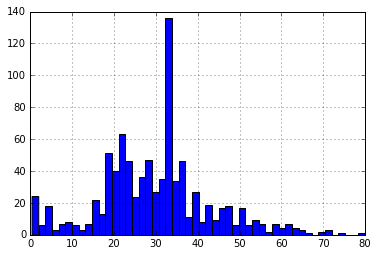

In [137]:
train['Age_imputed'].hist(bins=50)

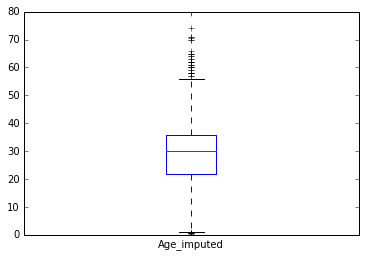

In [140]:
train['Age_imputed'].plot(kind='box')

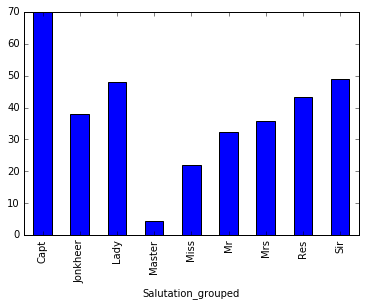

In [124]:
pt.plot(kind='bar')

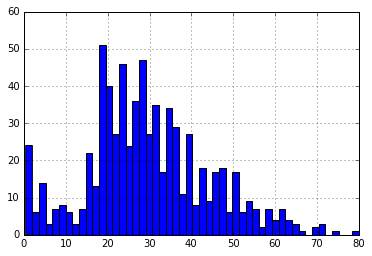

In [30]:
train['Age'].hist(bins=50)

In [43]:
pt = train.pivot_table(index='Sex', values ='Age')

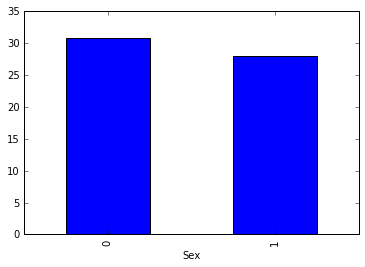

In [49]:
pt.plot(kind='bar')

In [75]:
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,predictions
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,0


In [77]:
train['Embarked'] = train['Embarked'].fillna('S')

In [78]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [79]:
train.loc[train['Embarked']=='S','Embarked'] = 0
train.loc[train['Embarked']=='C','Embarked'] = 1
train.loc[train['Embarked']=='Q','Embarked'] = 2

In [34]:
#### Cabin and Age are the only ones containing nan values

In [37]:
#### Cabin has 687/891 values null, maybe we should drop it

In [39]:
#### Age has 177/891 values, it seems a relevant factor, we should keep it

# Trying out gender model

In [80]:
train['predictions'] = train['Sex'].apply(lambda x: x)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(train['Survived'],train['predictions'])

0.78675645342312006

# Cleaning Age Values


In [88]:
train['Survived'].shape

(891,)

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train[['Sex']],train['Survived'])
accuracy_score(train['Survived'],model.predict(train[['Sex']]))

0.78675645342312006